In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

### The output above indicates that K-means generated 10 clusters with 64 features.

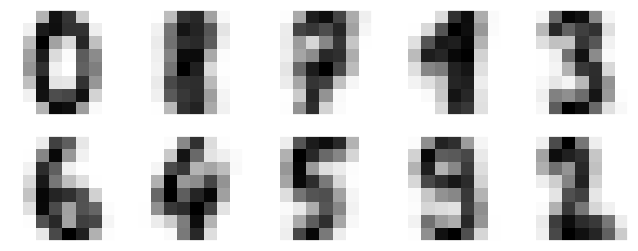

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
   axi.set(xticks=[], yticks=[])
   axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### The code below will match the learned cluster labels with the actual labels found in them.

In [8]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10072\1768486964.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.7918753478018921